<a href="https://colab.research.google.com/github/Rijan-Joshi/KMC_Note/blob/main/Introduction_to_Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
!pip install numpy pandas matplotlib

In [3]:
import numpy as np
x = np.ones(shape=(2,1))
print(x)

[[1.]
 [1.]]


Random Tensors


In [6]:
x = tf.random.normal(shape=(3,1), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[0.74325734]
 [0.7703145 ]
 [1.1877654 ]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3,1), minval= 0, maxval=1)
print(x)

tf.Tensor(
[[0.42308724]
 [0.7458825 ]
 [0.54204094]], shape=(3, 1), dtype=float32)


Creating Tensorflow variables and assigning a value to it


In [8]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.1905459 ],
       [ 2.2810838 ],
       [-0.39981988]], dtype=float32)>


In [9]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>


In [11]:
#Few tensor operation in tensorflow

a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

print(a, b, c, d, e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [12]:
input_var = tf.Variable(initial_value = 3.)
print(input_var)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [13]:
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Backpropagation using GradientTape in Tensorflow watching and manual marking**

---



In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)


tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order derivative or gradient**

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


Generating two classes of random points in a 2D plane


In [16]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

print(negative_samples)

[[ 1.48043295  5.27447256]
 [ 0.97175983  3.4455233 ]
 [-0.79071716  2.42802532]
 ...
 [-1.13272713  1.32793464]
 [ 0.15902312  3.04843122]
 [ 0.18439872  2.36253497]]


In [17]:
#Stacking two classes above into an array with shape(2000,2) and generating the corresponding targets
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[ 1.480433    5.2744727 ]
 [ 0.97175986  3.4455233 ]
 [-0.7907172   2.4280252 ]
 ...
 [ 3.1916926   0.7605248 ]
 [ 0.7978225  -1.276974  ]
 [ 3.3655984  -1.0184296 ]]


In [18]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

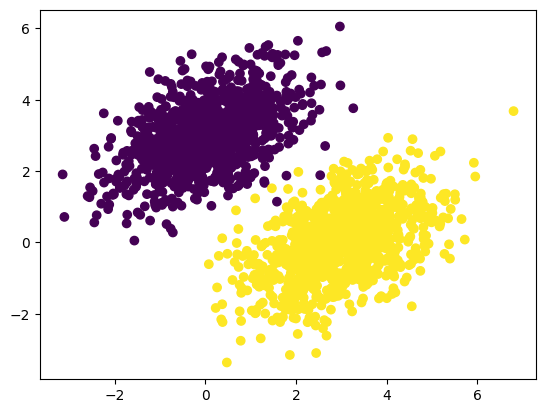

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [20]:
input_dim = 2
output_dim  = 1
W  = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))
print(W, b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.36651003],
       [0.389912  ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**Forward Pass Function**

In [21]:
def model(inputs):
  return tf.matmul(inputs, W) + b

**Loss function using square loss function**

In [22]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

**Training Step Function**

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss



**Batch Training**

In [24]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step} : {loss:.4f}')

Loss at step 0 : 1.1239
Loss at step 1 : 0.2112
Loss at step 2 : 0.1201
Loss at step 3 : 0.1023
Loss at step 4 : 0.0945
Loss at step 5 : 0.0885
Loss at step 6 : 0.0831
Loss at step 7 : 0.0782
Loss at step 8 : 0.0737
Loss at step 9 : 0.0697
Loss at step 10 : 0.0659
Loss at step 11 : 0.0625
Loss at step 12 : 0.0594
Loss at step 13 : 0.0565
Loss at step 14 : 0.0539
Loss at step 15 : 0.0515
Loss at step 16 : 0.0493
Loss at step 17 : 0.0473
Loss at step 18 : 0.0455
Loss at step 19 : 0.0438
Loss at step 20 : 0.0423
Loss at step 21 : 0.0409
Loss at step 22 : 0.0396
Loss at step 23 : 0.0384
Loss at step 24 : 0.0374
Loss at step 25 : 0.0364
Loss at step 26 : 0.0355
Loss at step 27 : 0.0347
Loss at step 28 : 0.0339
Loss at step 29 : 0.0332
Loss at step 30 : 0.0326
Loss at step 31 : 0.0320
Loss at step 32 : 0.0315
Loss at step 33 : 0.0310
Loss at step 34 : 0.0306
Loss at step 35 : 0.0302
Loss at step 36 : 0.0298
Loss at step 37 : 0.0295
Loss at step 38 : 0.0292
Loss at step 39 : 0.0289


**Plotting the linear model**

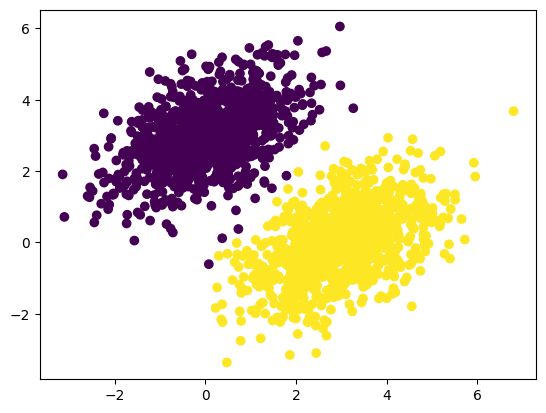

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

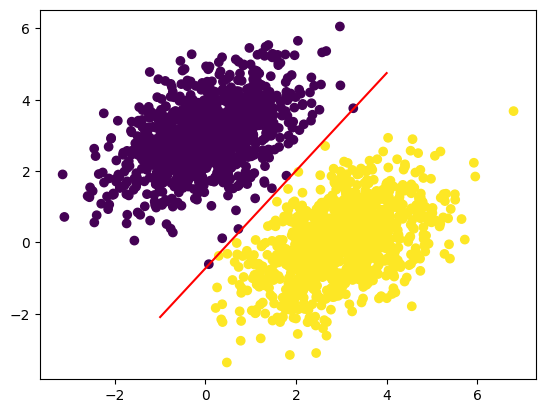

In [26]:
x = np.linspace(-1, 4, 10)
y = -W[0]/ W[1] * x  + (0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:,1], c = predictions[:, 0] > 0.5)